In [1]:
!pip install imblearn

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import precision_recall_curve
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [3]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load preprocessed data
X_train_processed = pd.read_csv('/content/drive/MyDrive/Train_Encoded.csv')
X_test_processed = pd.read_csv('/content/drive/MyDrive/Test_Encoded.csv')

In [5]:
#Convert string to list format
X_train_processed['document_vector'] = X_train_processed['document_vector_flat'].apply(lambda x: np.fromstring(x, sep=','))
X_test_processed['document_vector'] = X_test_processed['document_vector_flat'].apply(lambda x: np.fromstring(x, sep=','))

In [6]:
# Separate features and class labels
X_train = X_train_processed['document_vector'].tolist()
X_test = X_test_processed['document_vector'].tolist()
y_train = X_train_processed['hate_speech']
y_test = X_test_processed['hate_speech']

In [7]:
class_distribution = y_train.value_counts()

print("Class Distribution:")
print(class_distribution)

Class Distribution:
hate_speech
0    13513
1     4229
Name: count, dtype: int64


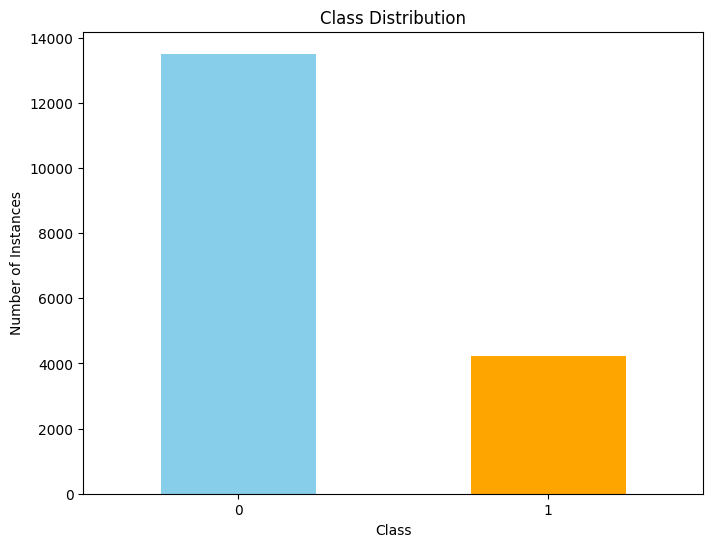

In [8]:
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.show()

In [9]:
# Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [10]:
X_train_resampled = np.array(X_train_resampled)

# Check the shape of the resampled dataset
print(X_train_resampled.shape)  # Expected shape: (num_samples, features_size)
print(y_train_resampled.shape)  # Expected shape: (num_samples,)

(27026, 300)
(27026,)


In [11]:
X_test = np.array(X_test)

# Check the shape of the resampled dataset
print(X_test.shape)  # Expected shape: (num_samples, features_size)
print(y_test.shape)  # Expected shape: (num_samples,)

(4436, 300)
(4436,)


# Simple Neural Network

## One Hidden Layer

In [12]:
# Define the model
model1 = Sequential()

#One input layer or hidden layer
model1.add(Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)))

# Add the output layer with sigmoid activation for binary classification
model1.add(Dense(1, activation='sigmoid'))

# Compile the model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               38528     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 38657 (151.00 KB)
Trainable params: 38657 (151.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Train the model
model1.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
338/338 [==============================] - 6s 12ms/step - loss: 0.5409 - accuracy: 0.7256 - val_loss: 0.5806 - val_accuracy: 0.6402
Epoch 2/20
338/338 [==============================] - 5s 14ms/step - loss: 0.4600 - accuracy: 0.7823 - val_loss: 0.7236 - val_accuracy: 0.5590
Epoch 3/20
338/338 [==============================] - 2s 7ms/step - loss: 0.4278 - accuracy: 0.8025 - val_loss: 0.5761 - val_accuracy: 0.6857
Epoch 4/20
338/338 [==============================] - 3s 8ms/step - loss: 0.4065 - accuracy: 0.8164 - val_loss: 0.5388 - val_accuracy: 0.7220
Epoch 5/20
338/338 [==============================] - 2s 7ms/step - loss: 0.3890 - accuracy: 0.8259 - val_loss: 0.4726 - val_accuracy: 0.7810
Epoch 6/20
338/338 [==============================] - 3s 7ms/step - loss: 0.3749 - accuracy: 0.8354 - val_loss: 0.4645 - val_accuracy: 0.7867
Epoch 7/20
338/338 [==============================] - 4s 13ms/step - loss: 0.3621 - accuracy: 0.8421 - val_loss: 0.5259 - val_accuracy: 0.7370
Epo

In [14]:
y_pred = (model1.predict(X_test) > 0.5).astype("int32")

139/139 [==============================] - 0s 1ms/step


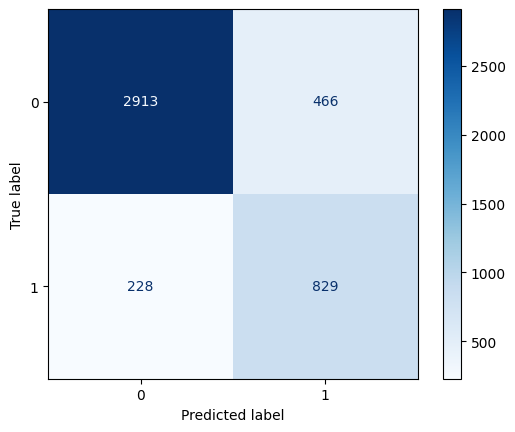

In [15]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [16]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8436
Precision: 0.6402
Recall: 0.7843
F1 Score: 0.7049


## Two Hidden Layers

In [17]:
model2 = Sequential()

#One input layer or Hidden Layer
model2.add(Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)))

#Another input layer
model2.add(Dense(64, activation='relu'))

# Add the output layer with sigmoid activation for binary classification
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               38528     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 46849 (183.00 KB)
Trainable params: 46849 (183.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Train the model
model2.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
338/338 [==============================] - 2s 4ms/step - loss: 0.4700 - accuracy: 0.7712 - val_loss: 0.6147 - val_accuracy: 0.6683
Epoch 2/20
338/338 [==============================] - 1s 4ms/step - loss: 0.3668 - accuracy: 0.8430 - val_loss: 0.4817 - val_accuracy: 0.7716
Epoch 3/20
338/338 [==============================] - 1s 4ms/step - loss: 0.3356 - accuracy: 0.8599 - val_loss: 0.3200 - val_accuracy: 0.8787
Epoch 4/20
338/338 [==============================] - 1s 4ms/step - loss: 0.3137 - accuracy: 0.8714 - val_loss: 0.3165 - val_accuracy: 0.8718
Epoch 5/20
338/338 [==============================] - 1s 4ms/step - loss: 0.2930 - accuracy: 0.8815 - val_loss: 0.3547 - val_accuracy: 0.8583
Epoch 6/20
338/338 [==============================] - 2s 5ms/step - loss: 0.2808 - accuracy: 0.8883 - val_loss: 0.3076 - val_accuracy: 0.8883
Epoch 7/20
338/338 [==============================] - 2s 6ms/step - loss: 0.2701 - accuracy: 0.8914 - val_loss: 0.2199 - val_accuracy: 0.9384
Epoch 

In [19]:
y_pred = (model2.predict(X_test) > 0.5).astype("int32")

139/139 [==============================] - 0s 2ms/step


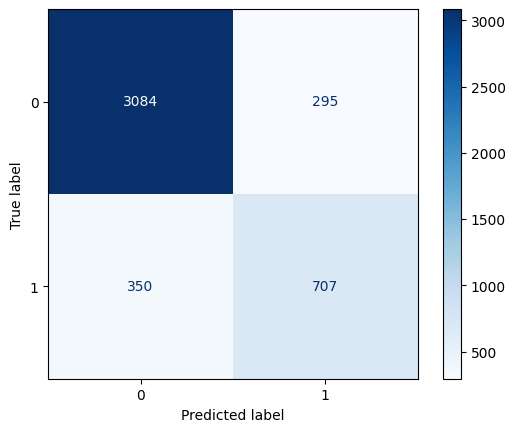

In [20]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [21]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8546
Precision: 0.7056
Recall: 0.6689
F1 Score: 0.6867


## Three Hidden Layers

In [22]:
#Define the model
model3 = Sequential()

#One Hidden Layer
model3.add(Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)))

#Another Hidden Layer
model3.add(Dense(64, activation='relu'))

#Another Hidden Layer
model3.add(Dense(32, activation='relu'))

# Add the output layer with sigmoid activation for binary classification
model3.add(Dense(1, activation='sigmoid'))

# Compile the model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               38528     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 48897 (191.00 KB)
Trainable params: 48897 (191.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Train the model
model3.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
338/338 [==============================] - 2s 4ms/step - loss: 0.4623 - accuracy: 0.7794 - val_loss: 0.5987 - val_accuracy: 0.6933
Epoch 2/20
338/338 [==============================] - 1s 4ms/step - loss: 0.3576 - accuracy: 0.8475 - val_loss: 0.4918 - val_accuracy: 0.7767
Epoch 3/20
338/338 [==============================] - 1s 4ms/step - loss: 0.3237 - accuracy: 0.8650 - val_loss: 0.3213 - val_accuracy: 0.8829
Epoch 4/20
338/338 [==============================] - 1s 4ms/step - loss: 0.2987 - accuracy: 0.8802 - val_loss: 0.2779 - val_accuracy: 0.8970
Epoch 5/20
338/338 [==============================] - 2s 5ms/step - loss: 0.2835 - accuracy: 0.8849 - val_loss: 0.2162 - val_accuracy: 0.9423
Epoch 6/20
338/338 [==============================] - 2s 6ms/step - loss: 0.2616 - accuracy: 0.8972 - val_loss: 0.4096 - val_accuracy: 0.8270
Epoch 7/20
338/338 [==============================] - 2s 6ms/step - loss: 0.2492 - accuracy: 0.9025 - val_loss: 0.2476 - val_accuracy: 0.9158
Epoch 

In [24]:
y_pred = (model3.predict(X_test) > 0.5).astype("int32")

139/139 [==============================] - 0s 2ms/step


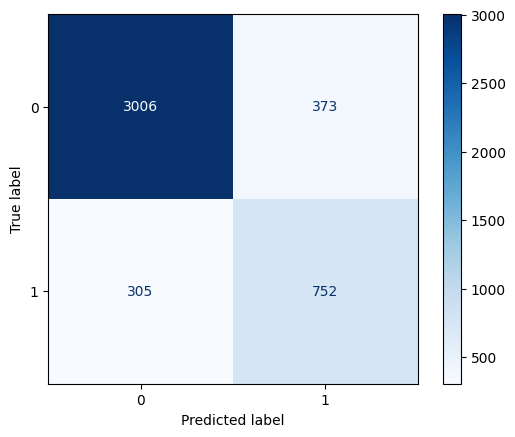

In [25]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [26]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8472
Precision: 0.6684
Recall: 0.7114
F1 Score: 0.6893


Two layers are enough. And now try Dropout()

### Set dropout to 20%

In [27]:
model4 = Sequential()

#One input layer or Hidden Layer
model4.add(Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)))

#Another input layer
model4.add(Dense(64, activation='relu'))

# Add the output layer with sigmoid activation for binary classification
model4.add(Dense(1, activation='sigmoid'))

model4.add(Dropout(0.2))

# Compile the model
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               38528     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
Total params: 46849 (183.00 KB)
Trainable params: 46849 (183.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Train the model
model4.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
338/338 [==============================] - 2s 4ms/step - loss: 1.5750 - accuracy: 0.7140 - val_loss: 0.8061 - val_accuracy: 0.5181
Epoch 2/20
338/338 [==============================] - 1s 4ms/step - loss: 1.4634 - accuracy: 0.7884 - val_loss: 0.7750 - val_accuracy: 0.5908
Epoch 3/20
338/338 [==============================] - 1s 4ms/step - loss: 1.4588 - accuracy: 0.8050 - val_loss: 0.7918 - val_accuracy: 0.5951
Epoch 4/20
338/338 [==============================] - 2s 5ms/step - loss: 1.4222 - accuracy: 0.8164 - val_loss: 0.6959 - val_accuracy: 0.6598
Epoch 5/20
338/338 [==============================] - 2s 6ms/step - loss: 1.4373 - accuracy: 0.8219 - val_loss: 0.6540 - val_accuracy: 0.6996
Epoch 6/20
338/338 [==============================] - 3s 8ms/step - loss: 1.3961 - accuracy: 0.8316 - val_loss: 0.5072 - val_accuracy: 0.8235
Epoch 7/20
338/338 [==============================] - 1s 4ms/step - loss: 1.4325 - accuracy: 0.8299 - val_loss: 0.6990 - val_accuracy: 0.6818
Epoch 

In [29]:
y_pred = (model4.predict(X_test) > 0.5).astype("int32")

139/139 [==============================] - 0s 2ms/step


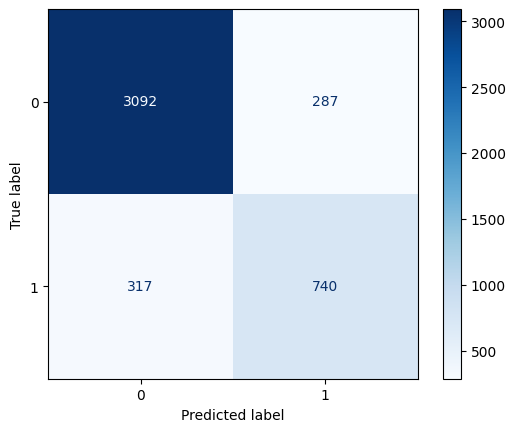

In [30]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [31]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8638
Precision: 0.7205
Recall: 0.7001
F1 Score: 0.7102


### Set dropout to 50%

In [32]:
model5 = Sequential()

#One input layer or Hidden Layer
model5.add(Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)))

#Another input layer
model5.add(Dense(64, activation='relu'))

# Add the output layer with sigmoid activation for binary classification
model5.add(Dense(1, activation='sigmoid'))

model5.add(Dropout(0.5))

# Compile the model
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               38528     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
 dropout_1 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 46849 (183.00 KB)
Trainable params: 46849 (183.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Train the model
model5.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
338/338 [==============================] - 2s 4ms/step - loss: 3.2381 - accuracy: 0.6431 - val_loss: 1.4654 - val_accuracy: 0.0209
Epoch 2/20
338/338 [==============================] - 1s 4ms/step - loss: 3.1144 - accuracy: 0.7064 - val_loss: 1.2282 - val_accuracy: 0.0109
Epoch 3/20
338/338 [==============================] - 3s 8ms/step - loss: 3.0951 - accuracy: 0.7269 - val_loss: 1.2061 - val_accuracy: 0.0205
Epoch 4/20
338/338 [==============================] - 3s 8ms/step - loss: 3.0631 - accuracy: 0.7345 - val_loss: 1.3144 - val_accuracy: 7.3992e-04
Epoch 5/20
338/338 [==============================] - 3s 8ms/step - loss: 3.0713 - accuracy: 0.7380 - val_loss: 1.0010 - val_accuracy: 0.0462
Epoch 6/20
338/338 [==============================] - 2s 5ms/step - loss: 3.0807 - accuracy: 0.7439 - val_loss: 1.1924 - val_accuracy: 0.1193
Epoch 7/20
338/338 [==============================] - 2s 4ms/step - loss: 3.0722 - accuracy: 0.7446 - val_loss: 1.1104 - val_accuracy: 0.0305
Ep

In [34]:
y_pred = (model5.predict(X_test) > 0.5).astype("int32")

139/139 [==============================] - 0s 2ms/step


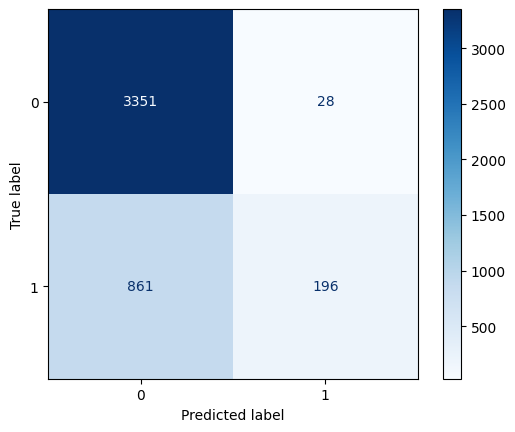

In [35]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [36]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.7996
Precision: 0.8750
Recall: 0.1854
F1 Score: 0.3060


It's better to set dropout to 20%, as the performance is effected when dropout set to 50%

# Model Tuning

### Implement early stopping and learning rate reduction techniques, while ensuring that 'y_pred' achieves a balanced precision and recall.


In [37]:
model = Sequential()

#One input layer or Hidden Layer
model.add(Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)))

#Another input layer
model.add(Dense(64, activation='relu'))

# Add the output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

model.add(Dropout(0.2))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               38528     
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
 dropout_2 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 46849 (183.00 KB)
Trainable params: 46849 (183.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.00001)

In [39]:
history = model.fit(X_train_resampled, y_train_resampled,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
338/338 [==============================] - 3s 4ms/step - loss: 1.5703 - accuracy: 0.7235 - val_loss: 0.7595 - val_accuracy: 0.5971 - lr: 0.0010
Epoch 2/50
338/338 [==============================] - 2s 6ms/step - loss: 1.4657 - accuracy: 0.7897 - val_loss: 0.7057 - val_accuracy: 0.6408 - lr: 0.0010
Epoch 3/50
338/338 [==============================] - 2s 6ms/step - loss: 1.4057 - accuracy: 0.8082 - val_loss: 0.6729 - val_accuracy: 0.6907 - lr: 0.0010
Epoch 4/50
338/338 [==============================] - 2s 5ms/step - loss: 1.4682 - accuracy: 0.8107 - val_loss: 0.9747 - val_accuracy: 0.4243 - lr: 0.0010
Epoch 5/50
338/338 [==============================] - 1s 4ms/step - loss: 1.4347 - accuracy: 0.8211 - val_loss: 0.5764 - val_accuracy: 0.7675 - lr: 0.0010
Epoch 6/50
338/338 [==============================] - 1s 4ms/step - loss: 1.3800 - accuracy: 0.8298 - val_loss: 0.7608 - val_accuracy: 0.6332 - lr: 0.0010
Epoch 7/50
338/338 [==============================] - 1s 4ms/step - lo

In [43]:
y_pred_02 = (model.predict(X_test) > 0.5).astype("int32")

139/139 [==============================] - 1s 5ms/step


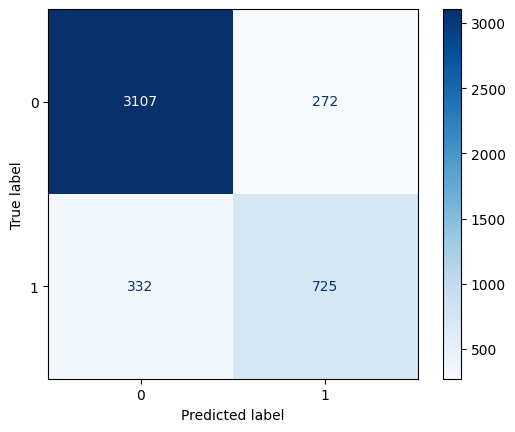

In [44]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_02)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [45]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_02)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(y_test, y_pred_02)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_test, y_pred_02)
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred_02)
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8638
Precision: 0.7272
Recall: 0.6859
F1 Score: 0.7059


## If we want to balance all the metrics, we can manually choose the threshold to balance precision and recall.

### Choose a threshold that balances precision and recall.

In [ ]:
from sklearn.metrics import precision_recall_curve

y_pred_prob = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Threshold
best_threshold = thresholds[np.argmax(precision * recall)]
y_pred = (y_pred_prob >= best_threshold).astype(int)
print(best_threshold)

139/139 [==============================] - 0s 2ms/step
0.39735657


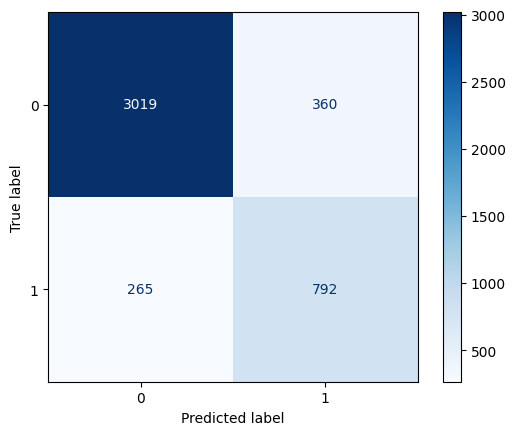

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8591
Precision: 0.6875
Recall: 0.7493
F1 Score: 0.7171
